In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy import misc

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-05-08 06:43:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  91.7MB/s    in 1.6s    

2020-05-08 06:43:48 (91.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse31-1.png', 'horse35-0.png', 'horse40-0.png', 'horse26-8.png', 'horse22-6.png', 'horse11-1.png', 'horse43-2.png', 'horse01-4.png', 'horse11-4.png', 'horse40-6.png']
['human06-24.png', 'human05-29.png', 'human13-07.png', 'human11-12.png', 'human06-27.png', 'human04-29.png', 'human15-16.png', 'human02-01.png', 'human17-18.png', 'human16-25.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [0]:
%matplotlib inline
import matplotlib.image as mpimg

### Displaying some random pictures

In [0]:
nrows = 4
ncols = 4
pic_index = 0

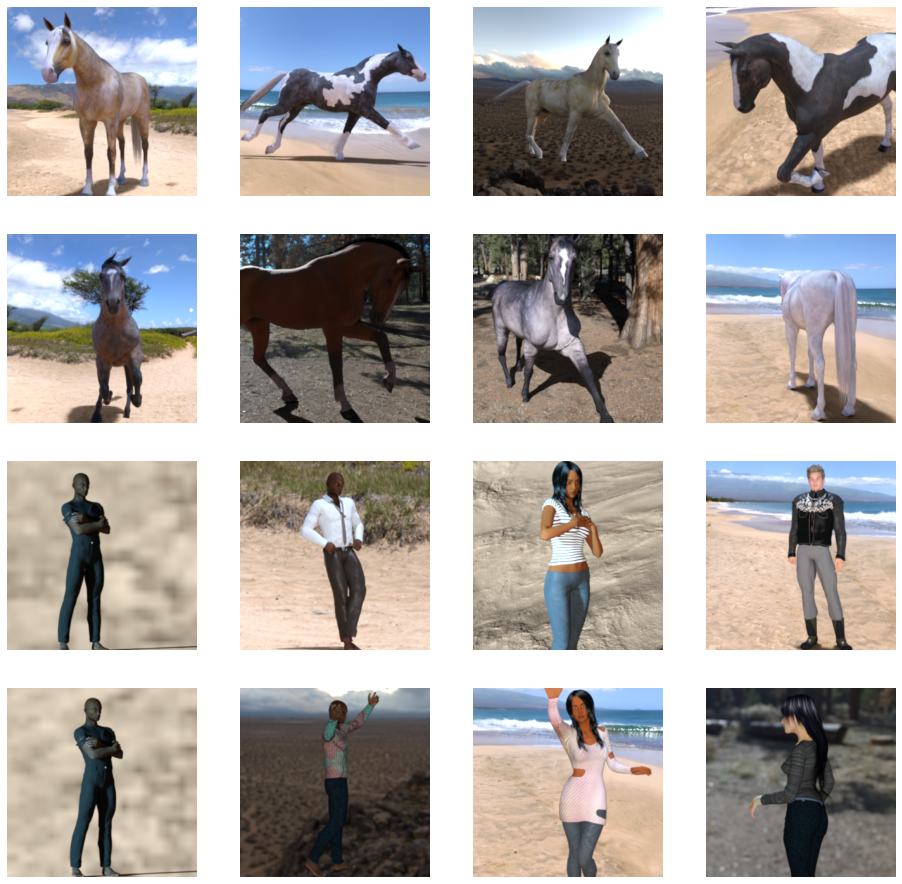

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [11]:
img_path

'/tmp/horse-or-human/humans/human02-01.png'

In [0]:
s=mpimg.imread('os.jpg')

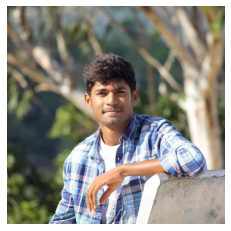

In [15]:
plt.imshow(s)
plt.axis('off')
plt.show()

## Creating a model

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

Found 1027 images belonging to 2 classes.


## Training the model

In [20]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=5)

Epoch 1/5
8/8 [==============================] - 80s 10s/step - loss: 1.0426 - accuracy: 0.5186
Epoch 2/5
8/8 [==============================] - 78s 10s/step - loss: 0.9359 - accuracy: 0.5884
Epoch 3/5
8/8 [==============================] - 67s 8s/step - loss: 0.4717 - accuracy: 0.7375
Epoch 4/5
8/8 [==============================] - 66s 8s/step - loss: 0.3240 - accuracy: 0.8732
Epoch 5/5
8/8 [==============================] - 66s 8s/step - loss: 0.2630 - accuracy: 0.9166


## Loss Graph

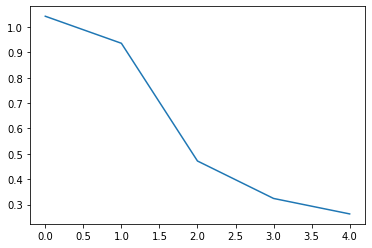

In [58]:
plt.plot(history.history['loss'])

## Running the Model

In [46]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

Saving IMG_4578.jpg to IMG_4578 (1).jpg


[0.]
IMG_4578.jpg is a horse


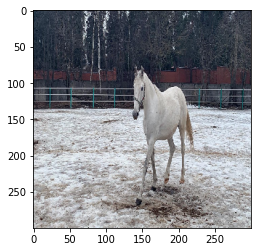

In [47]:
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  plt.imshow(img)
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving os.jpg to os (2).jpg
[1.]
os.jpg is a human


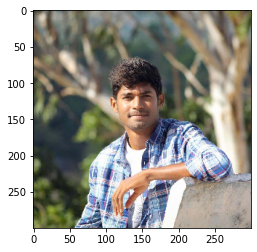

In [44]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  plt.imshow(img)
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

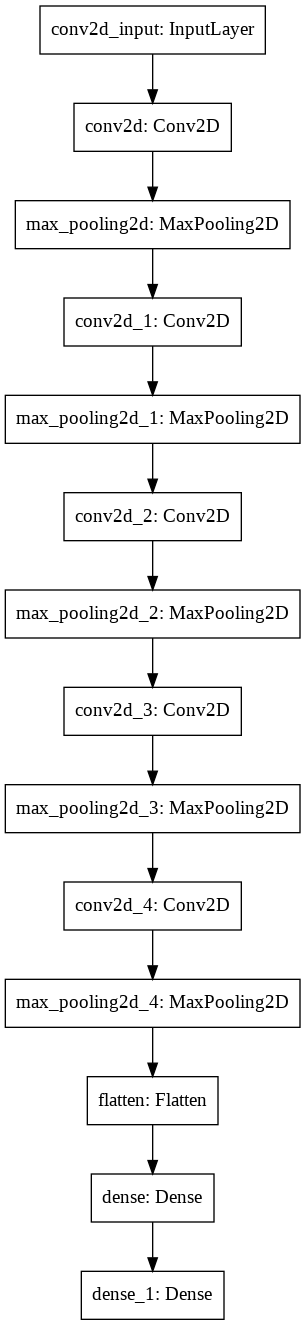

In [53]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

**Report:** This model works as a two class classifier ( human[1] & horse[0]). The accuracy can be increased by training with more number of epochs. Here there are 5 layers followed by flatten and dense layers and finally connected to a sigmoid unit. The model is little complex but it can be simplified by adding dropouts and by doing batch normalization thus the number of trainable parameters will be decreased.